# Case Study 3.1: Challenger Launch


DO IT YOURSELF
Case Study 3.1: Challenger Launch
Instructor: David Gamarnik
Activity Type: Optional 
Case Study Description: Learn to apply Logistic Regression in a practical real-world setting. Logistic Regression: The Challenging Disaster
Why this Case Study? Appreciate how simple and easy this analysis really is and how it could have potentially led to a different decision on the morning of the Challenger's launch.
Self-Help Documentation: In this document, we walk through some helpful tips to get you started with performing the analysis for the Challenger Case Study on your own. In this tutorial, we provide examples and some pseudo-code for the following programming environments: R, Python. 
Download Self-Help Documentation

Download Challenger Dataset

Time Required: The time required to do this activity varies depending on your experience in the required programming background. We suggest planning somewhere between 1 & 3 hours. Remember, this is an optional activity for participants looking for hands-on experience.

The	Data	
The	entire	data	of	observations	is	shown	below.	The	data	consists	of	three	columns:
Observation:	this	is	simply	the	count	of	the	observation.	
Y:	this	is	the	failure/success	label	for	each	observation.	If	there	was	a	failure,	Y=1.	Else,	Y=0.
X:	this	is	the	temperature	(degrees	Fahrenheit)	at	launch.
Copy	the	table	below	in	to	a	csv	(comma	separate	variable)	file	format.	A	sample	is	also	separately	made	
available	with	this	document.	It	is	titled	“challenger-data.csv”.
Observation	 Y	 X	 Observation	 Y	 X	
	1	 1 53 61	 0 70
2	 1 53 62	 0 70
3	 1 53 63	 0 70
4	 0 53 64	 0 70
5	 0 53 65	 0 70
6	 1 57 66	 0 70
7	 0 57 67	 0 70
8	 0 57 68	 0 70
9	 0 57 69	 0 70
10	 0 57 70	 0 70
11	 1 58 71	 0 72

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
dataset = pd.read_csv('challenger-data.csv')

In [4]:
dataset.head(5)

,Observation,Y,X
0,1,1,53
1,2,1,53
2,3,1,53
3,4,0,53
4,5,0,53


## Exploring the data: Descriptive statistics and visualizing

In [5]:
#Descriptive statistics
display(dataset.describe())

,Observation,Y,X
count,120.000000,120.000000,120.000000
mean,60.500000,0.083333,70.000000
std,34.785054,0.277544,7.100716
min,1.000000,0.000000,53.000000
25%,30.750000,0.000000,67.000000
50%,60.500000,0.000000,70.000000
75%,90.250000,0.000000,75.250000
max,120.000000,1.000000,81.000000


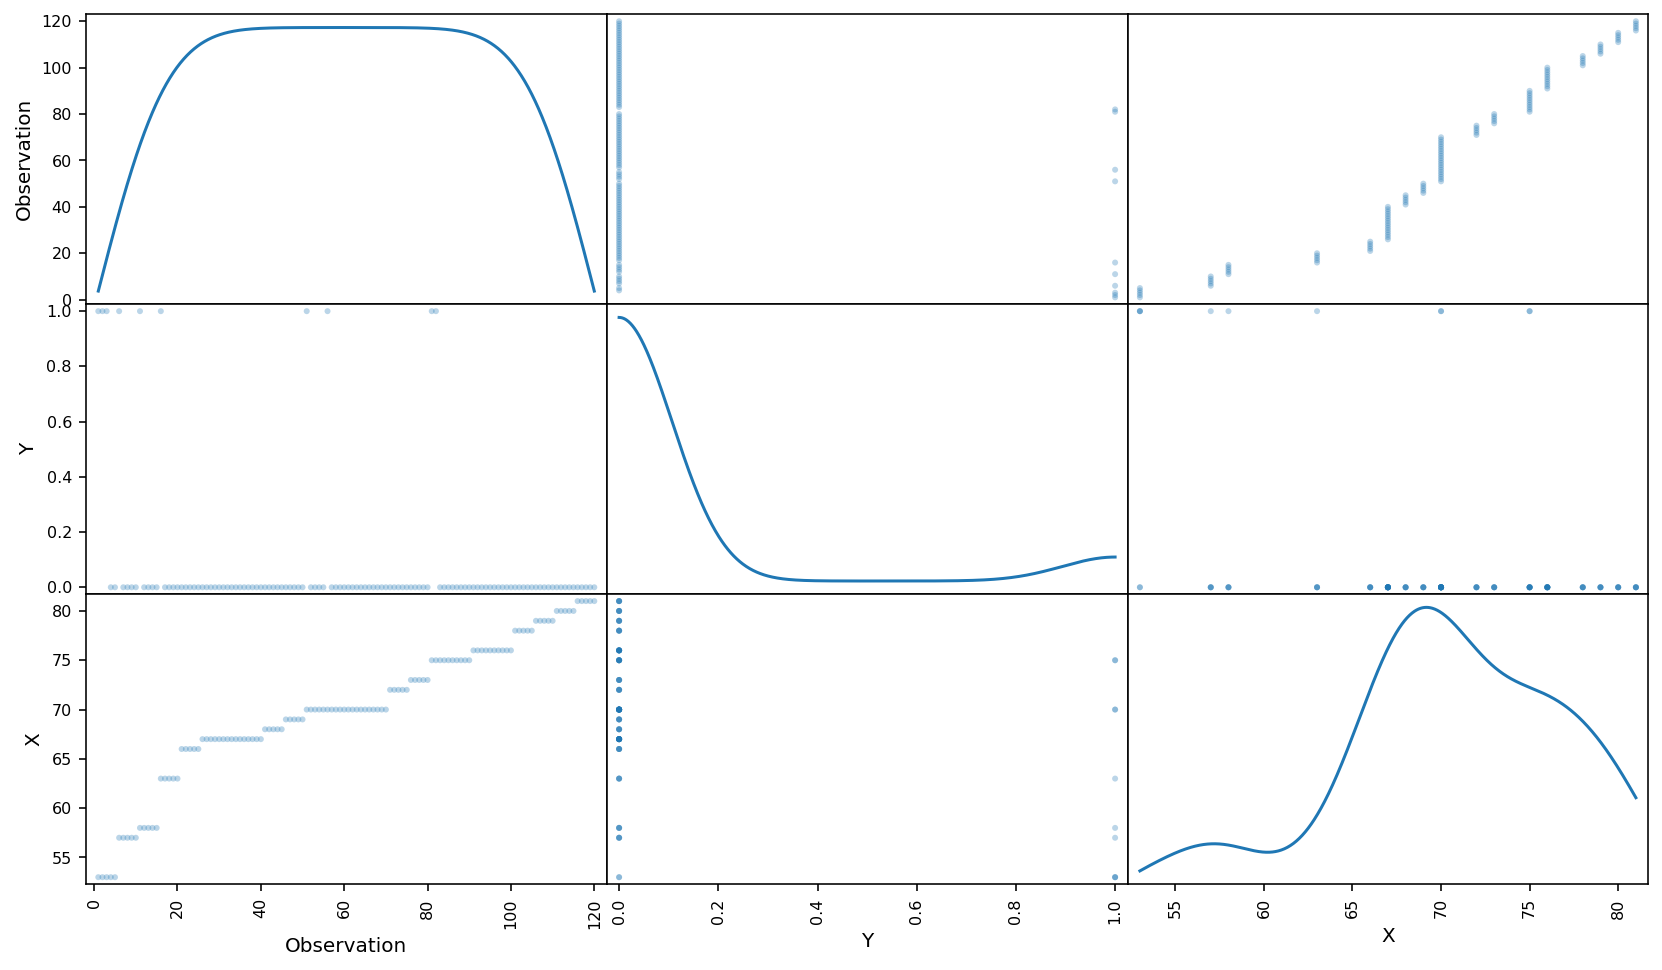

In [6]:
#Distributions
# Produce a scatter matrix for each pair of features in the data
pd.plotting.scatter_matrix(dataset, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

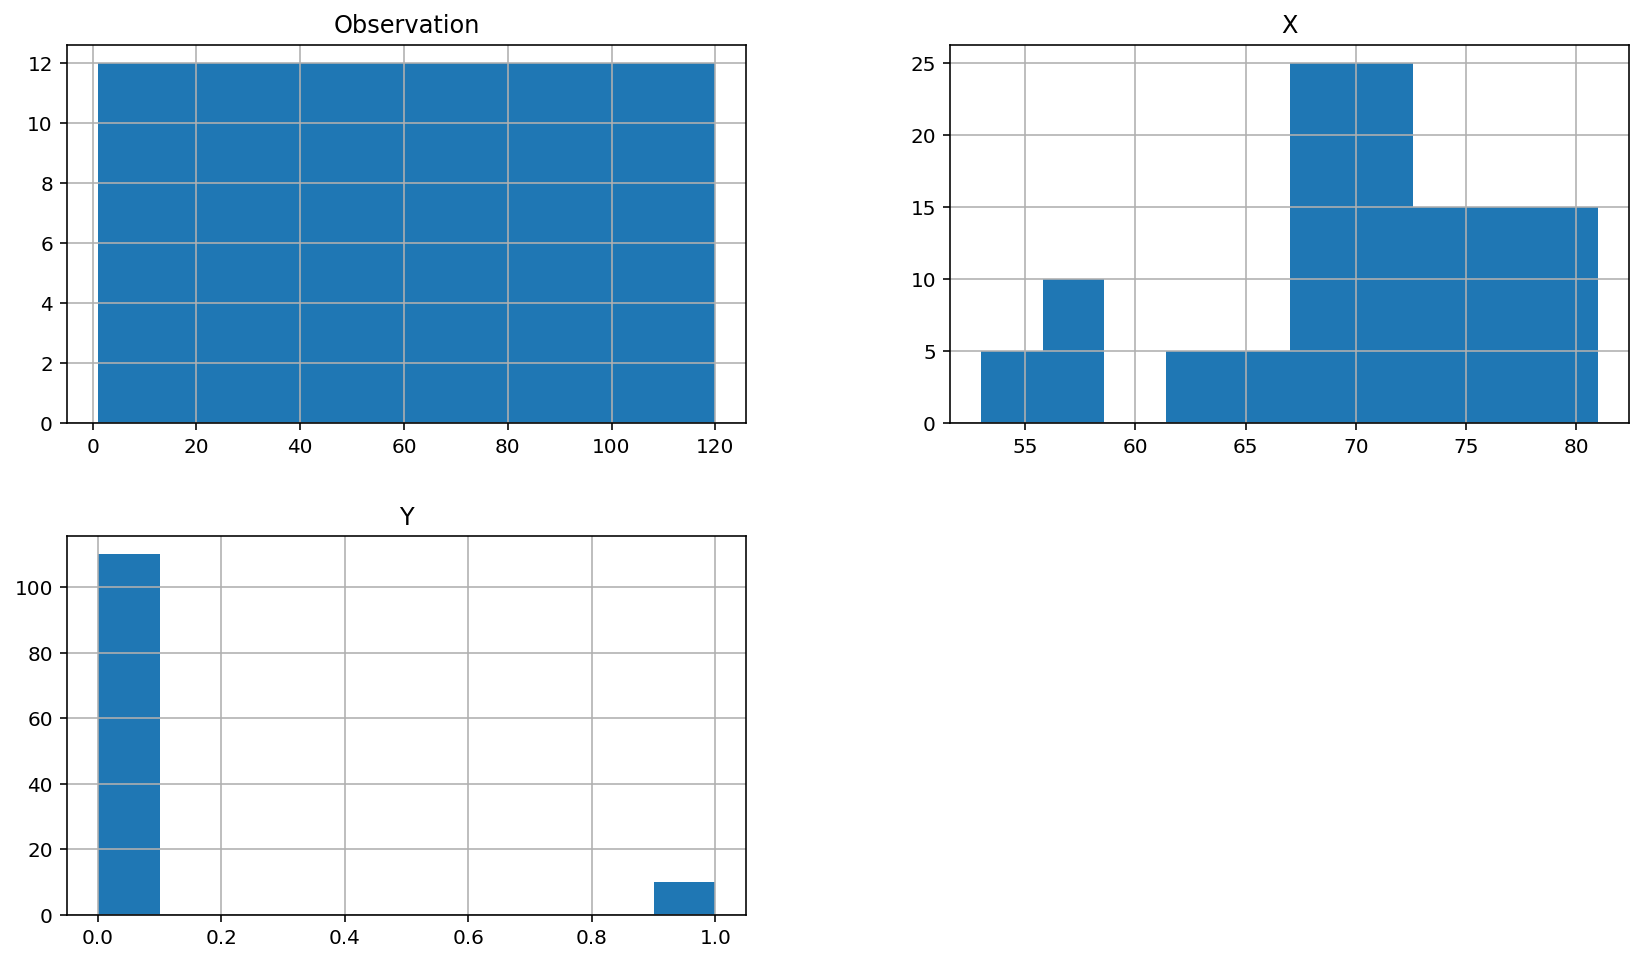

In [7]:
dataset.hist(figsize = (14,8));

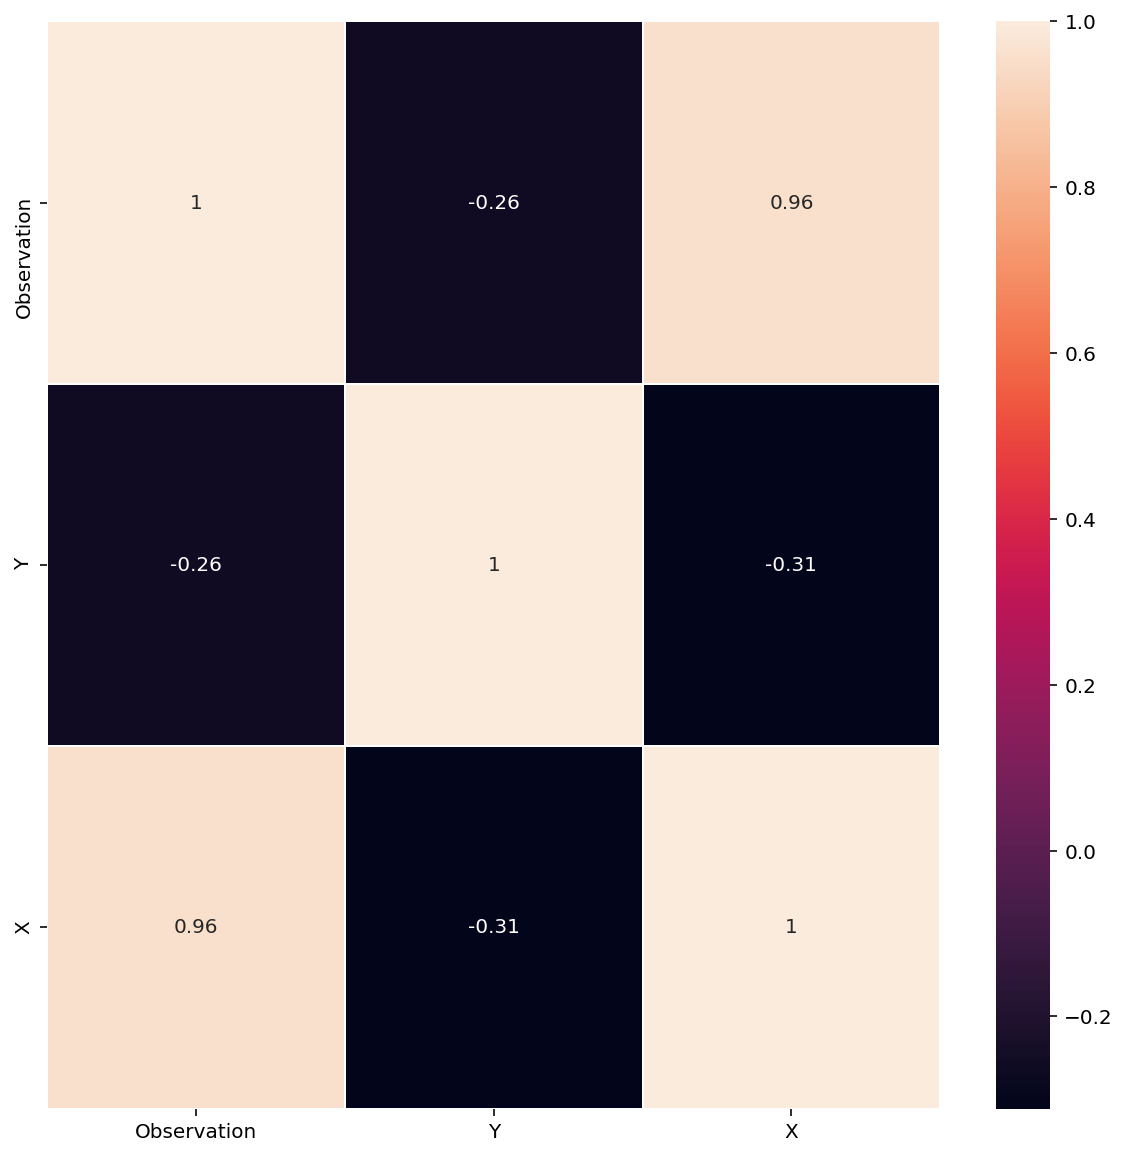

In [8]:
#checking correlation
#Adding graphs for correlation to help out throught the process

fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(dataset.corr(), annot=True, linewidths=.5, ax=ax);

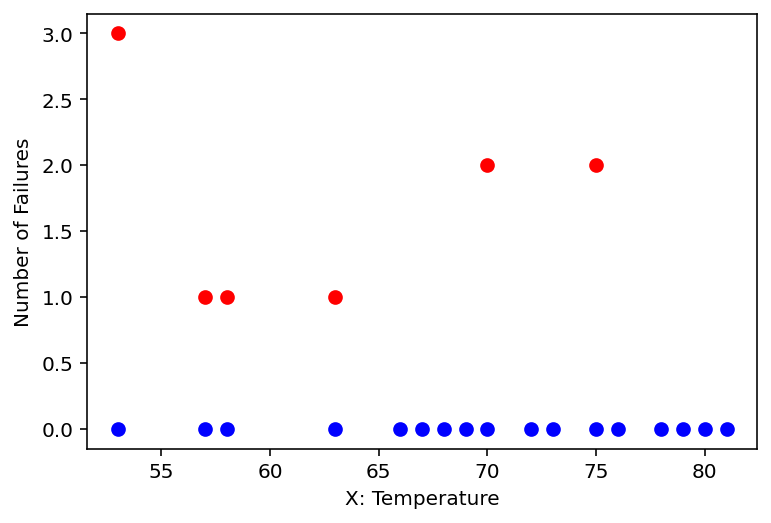

In [12]:
#subsetting data
data = dataset
failures = data.loc[(data.Y==1)]
no_failures =data.loc[(data.Y==0)]
#frequencies

failures_freq = failures.X.value_counts()#failures.groupby('X')
no_failures_freq = no_failures.X.value_counts()
#plotting
import matplotlib as mpl
from matplotlib import pyplot as plt
plt.scatter(failures_freq.index, failures_freq, c='red', s=40)
plt.scatter(no_failures_freq.index, np.zeros(len(no_failures_freq)), c='blue', s=40)
plt.xlabel('X: Temperature')
plt.ylabel('Number of Failures')
plt.show()

In [13]:
from patsy import dmatrices
import statsmodels.discrete.discrete_model as sm

In [14]:
#get the data in correct format
y, X = dmatrices('Y~X',data,return_type='dataframe')
#build the model
logit = sm.Logit(y, X)
result = logit.fit()
# summarize the model
print (result.summary())

Optimization terminated successfully.
         Current function value: 0.242411
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      Y   No. Observations:                  120
Model:                          Logit   Df Residuals:                      118
Method:                           MLE   Df Model:                            1
Date:                Thu, 21 May 2020   Pseudo R-squ.:                  0.1549
Time:                        12:00:17   Log-Likelihood:                -29.089
converged:                       True   LL-Null:                       -34.420
Covariance Type:            nonrobust   LLR p-value:                  0.001094
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.4049      3.041      2.435      0.015       1.445      13.365
X             -0.1466      0.

In [74]:
from sklearn.linear_model import LogisticRegression
#Getting features and target
#target = dataset['Y'].values.reshape(-1,1)
target = dataset['Y']
features = dataset['X'].values.reshape(-1,1)


In [81]:
clf = LogisticRegression(random_state=0, C=1e8).fit(features, target)

In [82]:
clf.coef_

array([[-0.14660942]])

In [83]:
clf.intercept_

array([7.40490897])

In [84]:
from sklearn.feature_selection import chi2
scores, pvalues = chi2(features, target)

In [85]:
pvalues

array([0.00395375])